### Project 0.2 | Hacker News Report
<ul>
    <li> Find the number of news that was posted from desired date range by user </li>
    <li> Data Should presented in dataframe <b>Completed</b></li>
    <li> Find number of average comment by hourly basis <b>Completed</b></li>
    <li> Plot the graph based on the number of news gathered over the timeframe <b>Completed</b></li>
</ul>    

<p> Technology and library that will be used in this project is </p> 
<ul> 
    <li> Python - Main language </li> 
    <li> Pandas, Numpy , Matplotlib </li> 
</ul> 

<p> Objective : Familiarise with oop concept , date manipulation </p>

<p> By : Farid </p>


### ------ Class , Methods & Functions ------

In [82]:
# import datetime as dt
from datetime import datetime as dt
# from scipy import stats 
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd 
from csv import reader
import matplotlib.pyplot as plt

In [2]:
class openfile():
    def __init__(self, fileurl):    
        self.data = fileurl
        self.opened_file = open(fileurl)
        self.read_file = reader(self.opened_file)
        self.result = list(self.read_file)
        
        #Dataframe manipulation
        dataframe =  pd.DataFrame(self.result)
        header = dataframe.iloc[0] #Getting the header
        content = dataframe[1:] #get data based after one column
        self.df = content.rename(columns=header) # Rename first column 
      

In [3]:
class openfile_list():
    def __init__(self, fileurl):    
        self.data = fileurl
        self.opened_file = open(fileurl)
        self.read_file = reader(self.opened_file)
        self.result = list(self.read_file)

In [4]:
#find total number of comment in its respective category 
def find_average(dataset,index):
    total_ask_comments = 0
    for i in dataset:
        num_comments = int(i[index])
        total_ask_comments += num_comments 
    avg_ask_comments = (total_ask_comments/int(len(ask_post)))
    return avg_ask_comments
    


### ---- Data Manipulation (Date and find average)----

In [5]:
#Using oop with class

hacker_data = openfile('../raw_data/hacker_news.csv')
hn = hacker_data.df
hn.head(5)

,id,title,url,num_points,num_comments,author,created_at
1,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
2,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
3,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
4,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
5,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


In [6]:
opened_file = open('../raw_data/hacker_news.csv')
read_file = reader(opened_file)
result = list(read_file)
header = result[0]
hn = result[1:] 

In [7]:
# -- Assigning data title to its respective group --

ask_post,show_post,other_post = [] , [] , []
for i in hn:
    title = i[1]
    if title.startswith('Ask'):
        ask_post.append(i)
    elif title.startswith('Show'):
        show_post.append(i)
    else:
        other_post.append(i)
        
print(len(ask_post))
print(len(show_post))
print(len(other_post))        

9248
10207
273664


In [12]:
avg_ask_comments = find_average(ask_post,4)
avg_show_comments = find_average(show_post,4)   


print(avg_ask_comments)
print(avg_show_comments)

10.345047577854672
5.3706747404844295


In [62]:
#Create datetime as module

result_list = []
for i in ask_post:
    created_at = i[6]
    num_comments = int(i[4])
    result_list.append([created_at, num_comments])
      
    
count_by_hour, comments_by_hr = {} , {}

for row in result_list:
    date = dt.strptime(row[0], "%m/%d/%Y %H:%M")
    hour = dt.strftime(date, "%H")
    if hour not in count_by_hour:
        count_by_hour[hour] = 1
        comments_by_hr[hour] = row[1]
    else:
        count_by_hour[hour] += 1
        comments_by_hr[hour] += row[1]
        
# for hr,no in count_by_hour.items():
#     if no is not 1:
#         print(no)
print(count_by_hour)    




{'02': 270, '01': 286, '22': 383, '21': 520, '19': 562, '17': 598, '15': 651, '14': 523, '13': 447, '11': 315, '10': 287, '09': 224, '07': 227, '03': 274, '23': 348, '20': 516, '16': 586, '08': 260, '00': 301, '18': 626, '12': 350, '04': 246, '06': 238, '05': 210}


In [61]:
#count the average by hour for the 2 dictionary (hr & no of comments)
avg_by_hour = []
for hr in count_by_hour:
    avg_by_hour.append([hr,comments_by_hr[hr]/count_by_hour[hr]])

In [79]:
#Data Presentation in list 
swap_avg_hour = []

#Swapping data for index 1 to index 0
for hr,avg in avg_by_hour:
    swap_avg_hour.append([avg , hr])

#Sorting data by descending order   , NOTE** This is using no swap data 
sorted_swap = sorted(avg_by_hour,key=lambda l:l[0], reverse=False)

#Print the top 5  hours comment 
str_format = '{hr}:00: {avg:.2f} average'

# --- Top 5 hours is ---
for i in sorted_swap[:5]:
    result = str_format.format(hr=i[0],avg=i[1])
    print(result)


00:00: 7.52 average
01:00: 7.31 average
02:00: 11.10 average
03:00: 8.00 average
04:00: 9.64 average


### ---- Visualisation ----

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
The highest commented time is at :  28.46


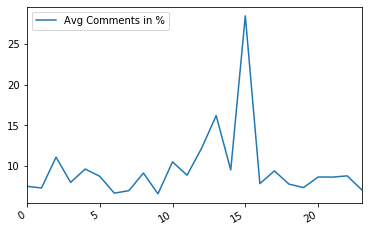

In [125]:
# Convert avg_to dataframe
%time
df = pd.DataFrame(sorted_swap, columns = ['Hours','Avg Comments in %']).round(2)
df.head(2)

max_rating = np.array(df['Avg Comments in %'])

df.plot(subplots=True)
print('The highest commented time is at : ' , np.max(max_rating) )

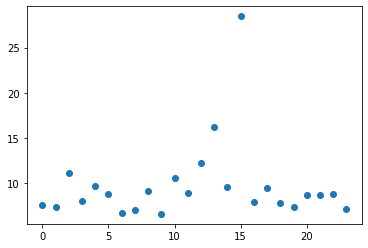

In [117]:
#convert data to arraylist with numpy
df_hr,df_convert_hr = np.array(df['Hours']) , []

for i in df_hr:
    df_convert_hr.append(int(i))
df_avg = np.array(df['Avg Comments in %'])


#Scatter plot 
plt.scatter(df_convert_hr,df_avg)

#Check if tis a bad fit with r-square value 
# slope, intercept, r, p, std_err = stats.linregress(df_hr, df_avg)
# print(rr)